### This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Object Creation
See the [Data Structure Intro section](Data Structure Intro section). Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame) by passing a numpy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20141101', periods=6)
dates

DatetimeIndex(['2014-11-01', '2014-11-02', '2014-11-03', '2014-11-04',
               '2014-11-05', '2014-11-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates,columns=['one','two','three','four'])
df

,one,two,three,four
2014-11-01,-1.184251,0.341710,0.166206,-0.274770
2014-11-02,0.559155,0.739468,1.201125,-0.458582
2014-11-03,-2.068049,0.337679,1.072904,-0.489154
2014-11-04,0.213051,-0.420929,-0.554413,0.276045
2014-11-05,-0.352307,-0.677703,0.452948,-1.006186
2014-11-06,-0.140584,-1.279327,0.330466,-0.551278


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
   ....:                      'B' : pd.Timestamp('20130102'),
   ....:                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
   ....:                      'D' : np.array([3] * 4,dtype='int32'),
   ....:                      'E' : pd.Categorical(["test","train","test","train"]),
   ....:                      'F' : 'foo' })
   ....: 
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes):

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


# Viewing Data
See the [Basics section](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics)
See the top & bottom rows of the frame

In [7]:
df.head()

,one,two,three,four
2014-11-01,-1.184251,0.341710,0.166206,-0.274770
2014-11-02,0.559155,0.739468,1.201125,-0.458582
2014-11-03,-2.068049,0.337679,1.072904,-0.489154
2014-11-04,0.213051,-0.420929,-0.554413,0.276045
2014-11-05,-0.352307,-0.677703,0.452948,-1.006186


In [8]:
df.tail(3)

,one,two,three,four
2014-11-04,0.213051,-0.420929,-0.554413,0.276045
2014-11-05,-0.352307,-0.677703,0.452948,-1.006186
2014-11-06,-0.140584,-1.279327,0.330466,-0.551278


Display the index, columns, and the underlying numpy data

In [9]:
df.index

DatetimeIndex(['2014-11-01', '2014-11-02', '2014-11-03', '2014-11-04',
               '2014-11-05', '2014-11-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['one', 'two', 'three', 'four'], dtype='object')

In [11]:
df.values

array([[-1.18425116,  0.34170954,  0.16620634, -0.2747697 ],
       [ 0.55915473,  0.73946807,  1.20112465, -0.45858197],
       [-2.06804948,  0.33767929,  1.07290352, -0.48915429],
       [ 0.21305136, -0.42092885, -0.55441306,  0.27604464],
       [-0.35230708, -0.67770308,  0.45294824, -1.00618556],
       [-0.14058394, -1.27932681,  0.33046639, -0.55127781]])

Describe shows a quick statistic summary of your data

In [12]:
df.describe()

,one,two,three,four
count,6.000000,6.000000,6.000000,6.000000
mean,-0.495498,-0.159850,0.444873,-0.417321
std,0.970371,0.761240,0.641205,0.417767
min,-2.068049,-1.279327,-0.554413,-1.006186
25%,-0.976265,-0.613510,0.207271,-0.535747
50%,-0.246446,-0.041625,0.391707,-0.473868
75%,0.124643,0.340702,0.917915,-0.320723
max,0.559155,0.739468,1.201125,0.276045


Transposing your data

In [13]:
df.T

,2014-11-01,2014-11-02,2014-11-03,2014-11-04,2014-11-05,2014-11-06
one,-1.184251,0.559155,-2.068049,0.213051,-0.352307,-0.140584
two,0.341710,0.739468,0.337679,-0.420929,-0.677703,-1.279327
three,0.166206,1.201125,1.072904,-0.554413,0.452948,0.330466
four,-0.274770,-0.458582,-0.489154,0.276045,-1.006186,-0.551278


Sorting by an axis (In this case, sorting the columns in reverse alphabetical order):

In [14]:
df.sort_index(axis=1, ascending=False)

,two,three,one,four
2014-11-01,0.341710,0.166206,-1.184251,-0.274770
2014-11-02,0.739468,1.201125,0.559155,-0.458582
2014-11-03,0.337679,1.072904,-2.068049,-0.489154
2014-11-04,-0.420929,-0.554413,0.213051,0.276045
2014-11-05,-0.677703,0.452948,-0.352307,-1.006186
2014-11-06,-1.279327,0.330466,-0.140584,-0.551278


Sorting by values

In [15]:
df.sort_values(by='two')

,one,two,three,four
2014-11-06,-0.140584,-1.279327,0.330466,-0.551278
2014-11-05,-0.352307,-0.677703,0.452948,-1.006186
2014-11-04,0.213051,-0.420929,-0.554413,0.276045
2014-11-03,-2.068049,0.337679,1.072904,-0.489154
2014-11-01,-1.184251,0.341710,0.166206,-0.274770
2014-11-02,0.559155,0.739468,1.201125,-0.458582


# Selection

Note While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.
See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

## Getting

Selecting a single column, which yields a Series, equivalent to df.one

In [16]:
df['one']

2014-11-01   -1.184251
2014-11-02    0.559155
2014-11-03   -2.068049
2014-11-04    0.213051
2014-11-05   -0.352307
2014-11-06   -0.140584
Freq: D, Name: one, dtype: float64

In [17]:
df.one

2014-11-01   -1.184251
2014-11-02    0.559155
2014-11-03   -2.068049
2014-11-04    0.213051
2014-11-05   -0.352307
2014-11-06   -0.140584
Freq: D, Name: one, dtype: float64

Selecting via [], which slices the rows.

In [18]:
df[0:3]

,one,two,three,four
2014-11-01,-1.184251,0.341710,0.166206,-0.274770
2014-11-02,0.559155,0.739468,1.201125,-0.458582
2014-11-03,-2.068049,0.337679,1.072904,-0.489154


In [19]:
df['20141102':'20141104']

,one,two,three,four
2014-11-02,0.559155,0.739468,1.201125,-0.458582
2014-11-03,-2.068049,0.337679,1.072904,-0.489154
2014-11-04,0.213051,-0.420929,-0.554413,0.276045


## Selecting by Label

See more in[ Selection by Label](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)

For getting a cross section using a label

In [20]:
df.loc[dates[0]]

one     -1.184251
two      0.341710
three    0.166206
four    -0.274770
Name: 2014-11-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [21]:
df.loc[:,['one','two']]

,one,two
2014-11-01,-1.184251,0.341710
2014-11-02,0.559155,0.739468
2014-11-03,-2.068049,0.337679
2014-11-04,0.213051,-0.420929
2014-11-05,-0.352307,-0.677703
2014-11-06,-0.140584,-1.279327


Showing label slicing, both endpoints are included

In [22]:
df.loc['20141102':'20141104',['one','two']]

,one,two
2014-11-02,0.559155,0.739468
2014-11-03,-2.068049,0.337679
2014-11-04,0.213051,-0.420929


Reduction in the dimensions of the returned object

In [23]:
df.loc['20141102',['one','two']]

one    0.559155
two    0.739468
Name: 2014-11-02 00:00:00, dtype: float64

For getting a scalar value

In [24]:
df.loc[dates[0],'one']

-1.1842511649075458

For getting fast access to a scalar (equiv to the prior method)

In [25]:
df.at[dates[0],'one']

-1.1842511649075458

## Selection by Position

See more in [Selection by Position](Selection by Position)

Select via the position of the passed integers

In [26]:
df.iloc[3]

one      0.213051
two     -0.420929
three   -0.554413
four     0.276045
Name: 2014-11-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

By lists of integer position locations, similar to the numpy/python style

In [27]:
df.iloc[[1,2,4],[0,2]]

,one,three
2014-11-02,0.559155,1.201125
2014-11-03,-2.068049,1.072904
2014-11-05,-0.352307,0.452948


For slicing rows explicitly

In [28]:
df.iloc[1:3,:]

,one,two,three,four
2014-11-02,0.559155,0.739468,1.201125,-0.458582
2014-11-03,-2.068049,0.337679,1.072904,-0.489154


For slicing columns explicitly

In [29]:
df.iloc[:,1:3]

,two,three
2014-11-01,0.341710,0.166206
2014-11-02,0.739468,1.201125
2014-11-03,0.337679,1.072904
2014-11-04,-0.420929,-0.554413
2014-11-05,-0.677703,0.452948
2014-11-06,-1.279327,0.330466


For getting a value explicitly

In [30]:
df.iloc[1,1]

0.7394680706774894

For getting fast access to a scalar (equiv to the prior method)

In [31]:
df.iat[0,0]

-1.1842511649075458

## Boolean Indexing
Using a single column’s values to select data.

In [32]:
df[df.one > 0.5]

,one,two,three,four
2014-11-02,0.559155,0.739468,1.201125,-0.458582


Selecting values from a DataFrame where a boolean condition is met.

In [33]:
df[df>0]

,one,two,three,four
2014-11-01,NaN,0.341710,0.166206,NaN
2014-11-02,0.559155,0.739468,1.201125,NaN
2014-11-03,NaN,0.337679,1.072904,NaN
2014-11-04,0.213051,NaN,NaN,0.276045
2014-11-05,NaN,NaN,0.452948,NaN
2014-11-06,NaN,NaN,0.330466,NaN


Using the isin method for filtering:

In [34]:
df2 = df.copy()
df2['five'] = ['one', 'one','two','three','four','three']
df2

,one,two,three,four,five
2014-11-01,-1.184251,0.341710,0.166206,-0.274770,one
2014-11-02,0.559155,0.739468,1.201125,-0.458582,one
2014-11-03,-2.068049,0.337679,1.072904,-0.489154,two
2014-11-04,0.213051,-0.420929,-0.554413,0.276045,three
2014-11-05,-0.352307,-0.677703,0.452948,-1.006186,four
2014-11-06,-0.140584,-1.279327,0.330466,-0.551278,three


In [35]:
df2[df2['five'].isin(['two','four'])]

,one,two,three,four,five
2014-11-03,-2.068049,0.337679,1.072904,-0.489154,two
2014-11-05,-0.352307,-0.677703,0.452948,-1.006186,four


## Setting
Setting a new column automatically aligns the data by the indexes

In [36]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20141101', periods=6))
s1

2014-11-01    1
2014-11-02    2
2014-11-03    3
2014-11-04    4
2014-11-05    5
2014-11-06    6
Freq: D, dtype: int64

In [37]:
df['six'] = s1
df

,one,two,three,four,six
2014-11-01,-1.184251,0.341710,0.166206,-0.274770,1
2014-11-02,0.559155,0.739468,1.201125,-0.458582,2
2014-11-03,-2.068049,0.337679,1.072904,-0.489154,3
2014-11-04,0.213051,-0.420929,-0.554413,0.276045,4
2014-11-05,-0.352307,-0.677703,0.452948,-1.006186,5
2014-11-06,-0.140584,-1.279327,0.330466,-0.551278,6


Setting values by label:

In [38]:
df.at[dates[0],'one'] = 0
df

,one,two,three,four,six
2014-11-01,0.000000,0.341710,0.166206,-0.274770,1
2014-11-02,0.559155,0.739468,1.201125,-0.458582,2
2014-11-03,-2.068049,0.337679,1.072904,-0.489154,3
2014-11-04,0.213051,-0.420929,-0.554413,0.276045,4
2014-11-05,-0.352307,-0.677703,0.452948,-1.006186,5
2014-11-06,-0.140584,-1.279327,0.330466,-0.551278,6


Setting values by position:

In [39]:
df.iat[0,1] = 0
df

,one,two,three,four,six
2014-11-01,0.000000,0.000000,0.166206,-0.274770,1
2014-11-02,0.559155,0.739468,1.201125,-0.458582,2
2014-11-03,-2.068049,0.337679,1.072904,-0.489154,3
2014-11-04,0.213051,-0.420929,-0.554413,0.276045,4
2014-11-05,-0.352307,-0.677703,0.452948,-1.006186,5
2014-11-06,-0.140584,-1.279327,0.330466,-0.551278,6


In [40]:
df.loc[:,'four'] = np.array([5] * len(df))
df

,one,two,three,four,six
2014-11-01,0.000000,0.000000,0.166206,5,1
2014-11-02,0.559155,0.739468,1.201125,5,2
2014-11-03,-2.068049,0.337679,1.072904,5,3
2014-11-04,0.213051,-0.420929,-0.554413,5,4
2014-11-05,-0.352307,-0.677703,0.452948,5,5
2014-11-06,-0.140584,-1.279327,0.330466,5,6


A where operation with setting.

In [41]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,one,two,three,four,six
2014-11-01,0.000000,0.000000,-0.166206,-5,-1
2014-11-02,-0.559155,-0.739468,-1.201125,-5,-2
2014-11-03,-2.068049,-0.337679,-1.072904,-5,-3
2014-11-04,-0.213051,-0.420929,-0.554413,-5,-4
2014-11-05,-0.352307,-0.677703,-0.452948,-5,-5
2014-11-06,-0.140584,-1.279327,-0.330466,-5,-6


## Missing Data
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [42]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,one,two,three,four,six,E
2014-11-01,0.000000,0.000000,0.166206,5,1,1.0
2014-11-02,0.559155,0.739468,1.201125,5,2,1.0
2014-11-03,-2.068049,0.337679,1.072904,5,3,NaN
2014-11-04,0.213051,-0.420929,-0.554413,5,4,NaN


To drop any rows that have missing data:

In [43]:
df1.dropna(how='any')

,one,two,three,four,six,E
2014-11-01,0.000000,0.000000,0.166206,5,1,1.0
2014-11-02,0.559155,0.739468,1.201125,5,2,1.0


Filling missing data:

In [44]:
df1.fillna(value=5)

,one,two,three,four,six,E
2014-11-01,0.000000,0.000000,0.166206,5,1,1.0
2014-11-02,0.559155,0.739468,1.201125,5,2,1.0
2014-11-03,-2.068049,0.337679,1.072904,5,3,5.0
2014-11-04,0.213051,-0.420929,-0.554413,5,4,5.0


## Operations
See the [Basic section on Binary Ops](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats
Operations in general *exclude* missing data.

Performing a descriptive statistic:

In [45]:
df.mean()

one     -0.298122
two     -0.216802
three    0.444873
four     5.000000
six      3.500000
dtype: float64

Same operation on the other axis:

In [46]:
df.mean(1)

2014-11-01    1.233241
2014-11-02    1.899949
2014-11-03    1.468507
2014-11-04    1.647542
2014-11-05    1.884588
2014-11-06    1.982111
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension. The following code also shifts the data vertically, leaving NaN values in the unoccupied spaces

In [47]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2014-11-01    NaN
2014-11-02    NaN
2014-11-03    1.0
2014-11-04    3.0
2014-11-05    5.0
2014-11-06    NaN
Freq: D, dtype: float64

In [48]:
df.sub(s, axis='index')

,one,two,three,four,six
2014-11-01,NaN,NaN,NaN,NaN,NaN
2014-11-02,NaN,NaN,NaN,NaN,NaN
2014-11-03,-3.068049,-0.662321,0.072904,4.0,2.0
2014-11-04,-2.786949,-3.420929,-3.554413,2.0,1.0
2014-11-05,-5.352307,-5.677703,-4.547052,0.0,0.0
2014-11-06,NaN,NaN,NaN,NaN,NaN


### Apply
Applying functions to the data

In [49]:
df.apply(np.cumsum)

,one,two,three,four,six
2014-11-01,0.000000,0.000000,0.166206,5,1
2014-11-02,0.559155,0.739468,1.367331,10,3
2014-11-03,-1.508895,1.077147,2.440235,15,6
2014-11-04,-1.295843,0.656219,1.885821,20,10
2014-11-05,-1.648150,-0.021485,2.338770,25,15
2014-11-06,-1.788734,-1.300811,2.669236,30,21


### Histogramming 
See more at [Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [50]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    1
2    1
3    1
4    5
5    3
6    1
7    1
8    3
9    3
dtype: int64

In [51]:
s.value_counts()

1    6
3    3
5    1
dtype: int64

### String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [52]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])


In [53]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
### Concat
pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with [concat()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html#pandas.concat):

In [54]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.037221,1.671785,0.318174,1.062451
1,-1.003435,-0.926492,-0.052477,2.299155
2,-0.820928,0.523961,-0.633423,-1.980705
3,1.956831,-0.169090,-0.851657,-1.060765
4,0.677046,-0.642545,-0.733929,-1.058831
5,0.509504,0.212671,0.413608,-0.183913
6,0.502975,0.180739,-1.346165,0.537679
7,0.059779,-2.587586,0.064381,-1.575480
8,-0.064139,1.013177,0.474575,-0.811914
9,-0.994080,-0.540192,-1.124673,0.797576


In [55]:
#break it into pieces:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  1.037221  1.671785  0.318174  1.062451
 1 -1.003435 -0.926492 -0.052477  2.299155
 2 -0.820928  0.523961 -0.633423 -1.980705,
           0         1         2         3
 3  1.956831 -0.169090 -0.851657 -1.060765
 4  0.677046 -0.642545 -0.733929 -1.058831
 5  0.509504  0.212671  0.413608 -0.183913
 6  0.502975  0.180739 -1.346165  0.537679,
           0         1         2         3
 7  0.059779 -2.587586  0.064381 -1.575480
 8 -0.064139  1.013177  0.474575 -0.811914
 9 -0.994080 -0.540192 -1.124673  0.797576]

In [56]:
pd.concat(pieces)


,0,1,2,3
0,1.037221,1.671785,0.318174,1.062451
1,-1.003435,-0.926492,-0.052477,2.299155
2,-0.820928,0.523961,-0.633423,-1.980705
3,1.956831,-0.169090,-0.851657,-1.060765
4,0.677046,-0.642545,-0.733929,-1.058831
5,0.509504,0.212671,0.413608,-0.183913
6,0.502975,0.180739,-1.346165,0.537679
7,0.059779,-2.587586,0.064381,-1.575480
8,-0.064139,1.013177,0.474575,-0.811914
9,-0.994080,-0.540192,-1.124673,0.797576


### Join

SQL style merges. See the [Database style joining](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [57]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [58]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [59]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [60]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [61]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [62]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append
Append rows to a dataframe. See the [Appending](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [63]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.315454,0.205409,0.957838,-1.002462
1,-0.784873,1.097924,0.610895,1.354353
2,0.298557,-0.916413,-0.045702,-1.711389
3,-0.890961,-1.582386,1.329869,-0.672656
4,-0.376487,0.518808,-1.162455,0.374221
5,-0.379384,-1.256014,0.172158,-0.279800
6,-0.728535,1.420707,-0.008747,-0.732798
7,-2.102130,0.006062,-0.812886,-0.348376


In [64]:
s = df.iloc[3]
s

A   -0.890961
B   -1.582386
C    1.329869
D   -0.672656
Name: 3, dtype: float64

In [65]:
df.append(s,ignore_index=True)

,A,B,C,D
0,0.315454,0.205409,0.957838,-1.002462
1,-0.784873,1.097924,0.610895,1.354353
2,0.298557,-0.916413,-0.045702,-1.711389
3,-0.890961,-1.582386,1.329869,-0.672656
4,-0.376487,0.518808,-1.162455,0.374221
5,-0.379384,-1.256014,0.172158,-0.279800
6,-0.728535,1.420707,-0.008747,-0.732798
7,-2.102130,0.006062,-0.812886,-0.348376
8,-0.890961,-1.582386,1.329869,-0.672656


# Grouping
By “group by” we are referring to a process involving one or more of the following steps

Splitting the data into groups based on some criteria
Applying a function to each group independently
Combining the results into a data structure

See the [Grouping section](https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [66]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                           'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                           'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.695852,-0.175785
1,bar,one,0.591779,-0.856639
2,foo,two,-0.124247,1.022038
3,bar,three,-1.089702,0.327939
4,foo,two,-1.175662,-0.116858
5,bar,two,0.703156,-0.531521
6,foo,one,0.376533,-1.398744
7,foo,three,-1.064818,-0.974598


Grouping and then applying a function sum to the resulting groups.

In [67]:
df.groupby('A').sum()

,C,D
A,,
bar,0.205233,-1.060222
foo,-1.292341,-1.643947


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [68]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.591779 -0.856639
    three -1.089702  0.327939
    two    0.703156 -0.531521
foo one    1.072385 -1.574529
    three -1.064818 -0.974598
    two   -1.299909  0.905180

# Reshaping
See the sections on [Hierarchical Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [69]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [70]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [71]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     1.508467  0.574079
      two     1.021028  1.101796
baz   one     0.118469 -0.049913
      two     1.374475 -0.114353
foo   one    -1.678693  1.379826
      two    -0.309062 -2.554448
qux   one     0.668616  0.733729
      two    -0.515316 -0.172140

The [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns.

In [72]:
stacked = df.stack()
stacked

first  second   
bar    one     A    1.508467
               B    0.574079
       two     A    1.021028
               B    1.101796
baz    one     A    0.118469
               B   -0.049913
       two     A    1.374475
               B   -0.114353
foo    one     A   -1.678693
               B    1.379826
       two     A   -0.309062
               B   -2.554448
qux    one     A    0.668616
               B    0.733729
       two     A   -0.515316
               B   -0.172140
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [unstack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the last level:

In [73]:
stacked.unstack()

A         B
first second                    
bar   one     1.508467  0.574079
      two     1.021028  1.101796
baz   one     0.118469 -0.049913
      two     1.374475 -0.114353
foo   one    -1.678693  1.379826
      two    -0.309062 -2.554448
qux   one     0.668616  0.733729
      two    -0.515316 -0.172140

In [74]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.508467  1.021028
      B  0.574079  1.101796
baz   A  0.118469  1.374475
      B -0.049913 -0.114353
foo   A -1.678693 -0.309062
      B  1.379826 -2.554448
qux   A  0.668616 -0.515316
      B  0.733729 -0.172140

In [75]:
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A  1.508467  0.118469 -1.678693  0.668616
       B  0.574079 -0.049913  1.379826  0.733729
two    A  1.021028  1.374475 -0.309062 -0.515316
       B  1.101796 -0.114353 -2.554448 -0.172140

### Pivot Tables
See the section on [Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [76]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-1.058591,0.335299
1,one,B,foo,-0.176173,1.162379
2,two,C,foo,-0.433861,0.137100
3,three,A,bar,-1.360154,1.441554
4,one,B,bar,0.269513,1.477703
5,one,C,bar,-0.625850,1.232963
6,two,A,foo,0.275368,0.595242
7,three,B,foo,-1.993304,0.577466
8,one,C,foo,-0.157549,0.033005
9,one,A,bar,-0.835932,1.501973


We can produce pivot tables from this data very easily:

In [77]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.835932 -1.058591
      B  0.269513 -0.176173
      C -0.625850 -0.157549
three A -1.360154       NaN
      B       NaN -1.993304
      C -0.143418       NaN
two   A       NaN  0.275368
      B -1.445411       NaN
      C       NaN -0.433861

# Time Series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries).

In [78]:
rng = pd.date_range('1/1/2017', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()


2017-01-01    27581
Freq: 5T, dtype: int64

Time zone representation

In [79]:
rng = pd.date_range('3/6/2017 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2017-03-06    0.541276
2017-03-07   -0.771929
2017-03-08    1.461682
2017-03-09   -0.743586
2017-03-10    1.745712
Freq: D, dtype: float64

In [80]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2017-03-06 00:00:00+00:00    0.541276
2017-03-07 00:00:00+00:00   -0.771929
2017-03-08 00:00:00+00:00    1.461682
2017-03-09 00:00:00+00:00   -0.743586
2017-03-10 00:00:00+00:00    1.745712
Freq: D, dtype: float64

Convert to another time zone

In [81]:
ts_utc.tz_convert('US/Eastern')

2017-03-05 19:00:00-05:00    0.541276
2017-03-06 19:00:00-05:00   -0.771929
2017-03-07 19:00:00-05:00    1.461682
2017-03-08 19:00:00-05:00   -0.743586
2017-03-09 19:00:00-05:00    1.745712
Freq: D, dtype: float64

Converting between time span representations

In [82]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.347355
2012-02-29   -1.794932
2012-03-31    0.863106
2012-04-30   -0.399423
2012-05-31    0.438725
Freq: M, dtype: float64

In [83]:
ps = ts.to_period('M')
ps

2012-01   -0.347355
2012-02   -1.794932
2012-03    0.863106
2012-04   -0.399423
2012-05    0.438725
Freq: M, dtype: float64

In [84]:
ps.to_timestamp()

2012-01-01   -0.347355
2012-02-01   -1.794932
2012-03-01    0.863106
2012-04-01   -0.399423
2012-05-01    0.438725
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [85]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    1.091327
1990-06-01 09:00   -1.189189
1990-09-01 09:00    1.665508
1990-12-01 09:00    0.342623
1991-03-01 09:00    0.703203
Freq: H, dtype: float64

# Categoricals
pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](https://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [86]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type:

In [87]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [88]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [89]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [90]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [91]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting
[Plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs

<AxesSubplot:>

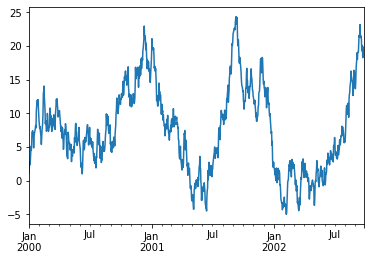

In [92]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

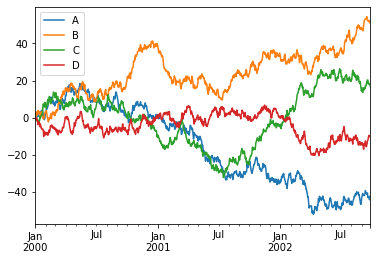

In [93]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

# Getting Data In/Out
### CSV
[Writing to a csv file](https://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv).

In [94]:
df.to_csv('foo.csv')

In [95]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.674207,0.682160,0.072689,-0.705308
1,2000-01-02,0.818763,0.031469,0.211548,-0.489543
2,2000-01-03,1.347483,2.031724,-1.439867,-1.068708
3,2000-01-04,0.800752,3.057048,-1.297325,-0.724501
4,2000-01-05,2.107452,1.613382,-0.664985,-0.167035
...,...,...,...,...,...
995,2002-09-22,-42.835727,51.871214,18.012146,-9.748625
996,2002-09-23,-43.090881,52.246241,18.114164,-10.257466
997,2002-09-24,-44.416565,52.180453,18.350021,-10.368141
998,2002-09-25,-43.847060,51.580455,18.150695,-10.251029


### HDF5
Reading and writing to [HDF5Stores](https://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5).

Writing to a HDF5 Store:

In [101]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store:

In [97]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,1.674207,0.682160,0.072689,-0.705308
2000-01-02,0.818763,0.031469,0.211548,-0.489543
2000-01-03,1.347483,2.031724,-1.439867,-1.068708
2000-01-04,0.800752,3.057048,-1.297325,-0.724501
2000-01-05,2.107452,1.613382,-0.664985,-0.167035
...,...,...,...,...
2002-09-22,-42.835727,51.871214,18.012146,-9.748625
2002-09-23,-43.090881,52.246241,18.114164,-10.257466
2002-09-24,-44.416565,52.180453,18.350021,-10.368141
2002-09-25,-43.847060,51.580455,18.150695,-10.251029


### Excel
Reading and writing to [MS Excel](https://pandas.pydata.org/pandas-docs/stable/io.html#io-excel).

Writing to an excel file:

In [98]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file:

In [99]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.674207,0.682160,0.072689,-0.705308
1,2000-01-02,0.818763,0.031469,0.211548,-0.489543
2,2000-01-03,1.347483,2.031724,-1.439867,-1.068708
3,2000-01-04,0.800752,3.057048,-1.297325,-0.724501
4,2000-01-05,2.107452,1.613382,-0.664985,-0.167035
...,...,...,...,...,...
995,2002-09-22,-42.835727,51.871214,18.012146,-9.748625
996,2002-09-23,-43.090881,52.246241,18.114164,-10.257466
997,2002-09-24,-44.416565,52.180453,18.350021,-10.368141
998,2002-09-25,-43.847060,51.580455,18.150695,-10.251029


# Gotchas
If you are trying an operation and you see an exception like:

In [100]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See[ Comparisons](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](https://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.